
# TSF GRIP - Data Science and Buisness Analytics 
##  Task: Prediction using Supervised ML
## By Jayprakash Bhure
### We need to predict the percentage of an student based on the number of study hours.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Importing dataset

In [2]:
# Reading data from url
url="http://bit.ly/w-data"
data=pd.read_csv(url)

### Basic statistical analysis

In [3]:
# Number of records and attributes in the imported dataset
data.shape

(25, 2)

In [4]:
# Printing first five records of the data
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
# Check if there is any null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

##### No null values are present so we don't need to clean the data

In [6]:
# Basic statistical information of the dataset rounded of to 3 decimals
data.describe().round(3)

,Hours,Scores
count,25.000,25.000
mean,5.012,51.480
std,2.525,25.287
min,1.100,17.000
25%,2.700,30.000
50%,4.800,47.000
75%,7.400,75.000
max,9.200,95.000


### Plotting the distribution of scores

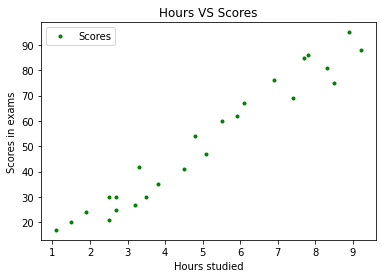

In [7]:
# Ploting distribution
data.plot(x="Hours",y="Scores",style=".",color='green')
plt.title("Hours VS Scores")
plt.xlabel("Hours studied")
plt.ylabel("Scores in exams")
plt.show()

#### From above graph we can see that the attribute and the target variable have strong linear relationship. Thus in order to be able to predict the scores based on the number of hours studied, we'll use Simple Linear Regression.

### Linear Regression model - Preparing the data

In [8]:
# Dividing data into attributes and labels
X=data.iloc[:, :-1].values
y=data.iloc[:,1].values

### Splitting the data into training and testing sets

In [9]:
# Spitting of dataset using sklearn library for obtaining test-train dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

### Training the model

In [10]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression()

### Plotting Regression Line

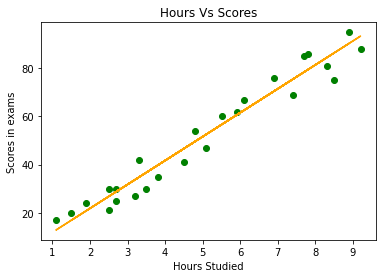

In [11]:
# Plotting the regression line using formula y=m*x+c
line=model.coef_*X+model.intercept_

plt.scatter(X,y,color='green')
plt.plot(X,line,color='orange')
plt.title("Hours Vs Scores")
plt.xlabel("Hours Studied")
plt.ylabel("Scores in exams")
plt.show()

### Making Predictions 

In [12]:
print(X_test)
y_pred=model.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


### Comparing Actual with Predicted

In [13]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


### Testing with custom data

In [14]:
# Checking for additional value
hrs = [[9.25]]
predict = model.predict(hrs)
print("No of Hours = {}".format(hrs))
print("Predicted Score = {}".format(predict[0].round(4)))

No of Hours = [[9.25]]
Predicted Score = 93.8927


In [15]:
#Evaluating the model
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_pred).round(4))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,y_pred).round(4))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)).round(4))

Mean Absolute Error:  4.1309
Mean Squared Error:  20.3329
Root Mean Squared Error:  4.5092
